<a href="https://colab.research.google.com/github/Abhiram-k1/FAKE-NEWS-CLASSIFICATION/blob/main/News_article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Shape: (72134, 4)
Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Missing values:
 Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Sample cleaned t

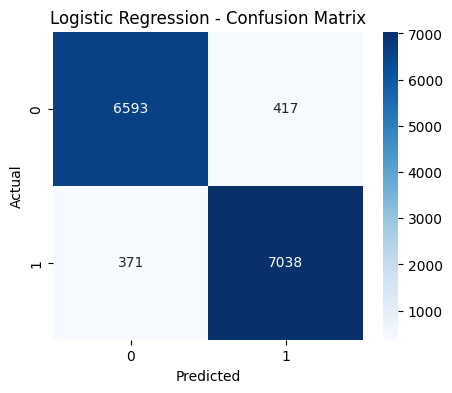


--- Naive Bayes ---
Accuracy: 0.8440252444691033
Precision: 0.8352390852390852
Recall: 0.867593467404508
F1 Score: 0.8511089043363125

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      7010
           1       0.84      0.87      0.85      7409

    accuracy                           0.84     14419
   macro avg       0.84      0.84      0.84     14419
weighted avg       0.84      0.84      0.84     14419



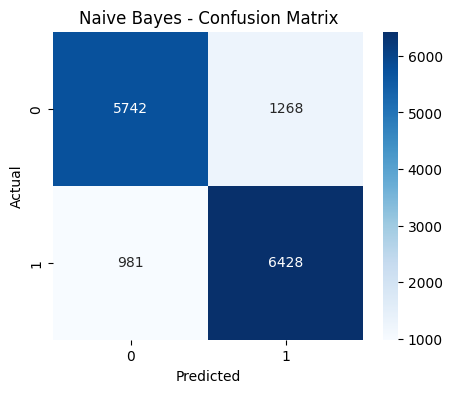


Model and vectorizer saved!


In [ ]:
# ===============================
# STEP 1: Import dependencies
# ===============================
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import joblib

# ===============================
# STEP 2: Load dataset
# ===============================
df = pd.read_csv("WELFake_Dataset.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing text
df = df.dropna(subset=["text"])

# ===============================
# STEP 3: Text preprocessing
# ===============================

stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_text"] = df["text"].apply(clean_text)

print("\nSample cleaned text:\n", df["clean_text"].head())

# ===============================
# STEP 4: Features & Labels
# ===============================
X = df["clean_text"]
y = df["label"]

# Train-Test Split (no stratify to avoid class imbalance error)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ===============================
# STEP 5: TF-IDF Vectorization
# ===============================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("\nTF-IDF shape (train):", X_train_tfidf.shape)

# ===============================
# STEP 6: Train Models
# ===============================

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
lr_preds = lr.predict(X_test_tfidf)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_preds = nb.predict(X_test_tfidf)

# ===============================
# STEP 7: Evaluation
# ===============================

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, nb_preds, "Naive Bayes")

# ===============================
# STEP 8: Save Model & Vectorizer
# ===============================
joblib.dump(lr, "fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("\nModel and vectorizer saved!")